## API - Application Program Interface
- Input and output
- Exp: Pandas

## REST APIs - REpresentational State Transfer APIs

In [2]:
!pip install nba_api

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from nba_api.stats.static import teams
nba_teams=teams.get_teams()    
nba_teams[:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [22]:
#Cobert dictionary to a table
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}

    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

dict_nba_team=one_dict(nba_teams)

#Convert to data frame
import pandas as pd
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [24]:
#Use nickname to find the id
warriors=df_teams[df_teams["nickname"]=="Warriors"]
warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [26]:
id=warriors[["id"]].values[0][0]
id

1610612744

In [37]:
from nba_api.stats.endpoints import leaguegamefinder
gamefinder=leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
games=gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612744,GSW,Golden State Warriors,0022401117,2025-04-03,GSW @ LAL,W,241,123,...,0.839,14.0,32.0,46.0,30,5,2,13,21,7.0
1,22024,1610612744,GSW,Golden State Warriors,0022401100,2025-04-01,GSW @ MEM,W,241,134,...,1.000,15.0,34.0,49.0,29,11,3,11,22,9.0
2,22024,1610612744,GSW,Golden State Warriors,0022401086,2025-03-30,GSW @ SAS,W,242,148,...,0.789,10.0,34.0,44.0,42,17,3,12,15,42.0
3,22024,1610612744,GSW,Golden State Warriors,0022401072,2025-03-28,GSW @ NOP,W,242,111,...,0.759,18.0,32.0,50.0,29,10,1,10,22,16.0
4,22024,1610612744,GSW,Golden State Warriors,0022401047,2025-03-25,GSW @ MIA,L,240,86,...,0.688,14.0,24.0,38.0,20,8,1,12,14,-26.0


In [40]:
gamehome=games[games["MATCHUP"]=="GSW vs. TOR"]
gamehome

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
6,22024,1610612744,GSW,Golden State Warriors,0022401005,2025-03-20,GSW vs. TOR,W,239,117,...,0.786,11.0,27.0,38.0,30,13,5,14,15,3.0
137,22023,1610612744,GSW,Golden State Warriors,0022300504,2024-01-07,GSW vs. TOR,L,241,118,...,0.933,15.0,28.0,43.0,30,5,4,10,11,-15.0
231,22022,1610612744,GSW,Golden State Warriors,0022200740,2023-01-27,GSW vs. TOR,W,241,129,...,0.733,5.0,38.0,43.0,40,5,1,12,18,12.0
380,22021,1610612744,GSW,Golden State Warriors,0022100252,2021-11-21,GSW vs. TOR,W,241,119,...,0.792,8.0,39.0,47.0,31,5,7,16,18,15.0
405,22021,1610612744,GSW,Golden State Warriors,1522100027,2021-08-11,GSW vs. TOR,W,200,90,...,0.680,12.0,25.0,37.0,18,10,5,14,23,6.0
473,22020,1610612744,GSW,Golden State Warriors,0022000148,2021-01-10,GSW vs. TOR,W,240,106,...,0.895,12.0,39.0,51.0,30,2,10,15,18,1.0
488,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14.0,38.0,52.0,34,4,5,15,23,-8.0
559,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8,3,20,25,10.0
564,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11.0,31.0,42.0,28,9,6,16,23,-4.0
566,42018,1610612744,GSW,Golden State Warriors,0041800404,2019-06-07,GSW vs. TOR,L,241,92,...,0.667,8.0,34.0,42.0,26,6,6,17,23,-13.0


In [41]:
gameaway=games[games["MATCHUP"]=="GSW @ TOR"]
gameaway

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
37,22024,1610612744,GSW,Golden State Warriors,0022400550,2025-01-13,GSW @ TOR,L,241,101,...,0.682,14.0,32.0,46.0,23,11,4,14,14,-3.0
114,22023,1610612744,GSW,Golden State Warriors,0022300860,2024-03-01,GSW @ TOR,W,241,120,...,0.778,15.0,41.0,56.0,26,10,5,14,14,15.0
178,22023,1610612744,GSW,Golden State Warriors,1522300062,2023-07-15,GSW @ TOR,L,256,101,...,0.867,14.0,22.0,36.0,24,13,6,21,29,1.2
249,22022,1610612744,GSW,Golden State Warriors,0022200448,2022-12-18,GSW @ TOR,W,240,126,...,0.846,12.0,29.0,41.0,31,6,2,17,21,16.0
367,22021,1610612744,GSW,Golden State Warriors,0022100443,2021-12-18,GSW @ TOR,L,240,100,...,0.714,11.0,36.0,47.0,26,5,5,20,21,-19.0
434,22020,1610612744,GSW,Golden State Warriors,0022000737,2021-04-02,GSW @ TOR,L,240,77,...,0.778,7.0,31.0,38.0,19,5,4,21,18,-53.0
565,42018,1610612744,GSW,Golden State Warriors,0041800405,2019-06-10,GSW @ TOR,W,240,106,...,0.714,6.0,31.0,37.0,27,5,7,15,22,1.0
568,42018,1610612744,GSW,Golden State Warriors,0041800402,2019-06-02,GSW @ TOR,W,240,109,...,0.870,6.0,36.0,42.0,34,7,5,15,26,5.0
569,42018,1610612744,GSW,Golden State Warriors,0041800401,2019-05-30,GSW @ TOR,L,239,109,...,0.935,9.0,29.0,38.0,29,6,2,16,27,-9.0
645,22018,1610612744,GSW,Golden State Warriors,0021800316,2018-11-29,GSW @ TOR,L,265,128,...,0.850,17.0,29.0,46.0,27,6,5,14,22,-3.0


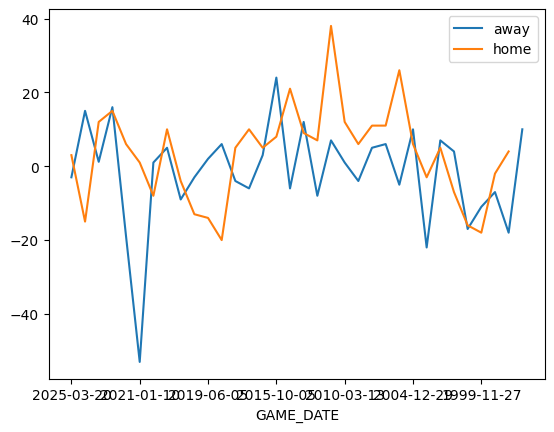

In [43]:
#Plot the graph
import matplotlib.pyplot as plt

fig, ax=plt.subplots()
gameaway.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)
gamehome.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)
ax.legend(["away","home"])
plt.show()